# Load hdf file and post-process

For a given model (as guitar_model above), set internal data using hdf5 input. Useful for post-processing only. 

Prerequisite : a complete simulation saved in hdf file (e.g. results of run.py)

### Usage: 

* call load_model function : create a model (dynamical system, interactions and so on) and load results from a previous simu from hdf file
* call post-processing tools

In [1]:
# Reload automatically all python modules before each cell exec
%load_ext autoreload
%autoreload 2

In [2]:
# standard python packages
import sys
import time
import os
import numpy as np
from model_tools import load_model
# visu
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import scipy.io
import h5py

## Pick up results file(s)

Either choose one or more campaigns (A)
or explicitely set input file  (B)

In [ ]:
# Case (A)
from post_process import compute_errors, plot_campaign
import simulation_campaigns
# Set path to matlab inputs
matlab_frets = './bass_guitar/pb2'
matlab_fretless = './fretless_bass_guitar/bsf'
campaigns = {}
campaigns['bass_09'] = (simulation_campaigns.campaign_14112017, matlab_frets)
campaigns['bass_0'] = (simulation_campaigns.campaign_16112017,  matlab_frets)
campaigns['fretless_09'] = (simulation_campaigns.campaign_17112017,  matlab_fretless)
campaigns['fretless_0'] = (simulation_campaigns.campaign_17112017_2, matlab_fretless)

# Case (B)
# filelist = ['./results/F_15680_id_3755969/g_862_15680.h5']

## Convergence study

In [ ]:
errors = {}
for name in campaigns:
    filelist = campaigns[name][0]['files_converted']
    #print(filelist, '\n')


In [ ]:
# Select a campaign and converted files
errors = {}
freqs = {}
for name in campaigns:
    filelist = campaigns[name][0]['files_converted']
    matlab_input = campaigns[name][1]
    errors[name] = compute_errors(filelist, indices=[10, 400, 800],
                                  from_matlab=matlab_input)
    freqs[name] = campaigns[name][0]['freqs']

In [ ]:
name = 'fretless_0'
ref_error = errors[name]
ref_freqs = freqs[name]
#plt.loglog(ref_freqs[:-1], ref_error[:,0], 'o-')
#plt.loglog(ref_freqs[:-1], ref_error[:,1], '*-')
plt.loglog(ref_freqs[:-1], ref_error[:,1], '+-')

name = 'fretless_09'
ref_error = errors[name]
ref_freqs = freqs[name]
#plt.loglog(ref_freqs[:-1], ref_error[:,0], 'x')
#plt.loglog(ref_freqs[:-1], ref_error[:,1], '^-')
plt.loglog(ref_freqs[:-1], ref_error[:,1], 's-')





## Plot trajectories
Use plotTraj(dynamical_system, list of dof to be plotted)

If list of dof is not set, all dof will be plotted.

Result = dof as a function of time +  zoom specific ranges (as in the paper)

To save the resulting figure(s), add argument filename when calling plotTraj

Arg 'iplot' is used to change figure number. Set same iplot if you want to plot all curves on the same figure.
Default iplot=0.

### Select campaign and required freq

In [ ]:
name = 'bass_0'
filelist = campaigns[name][0]['files_converted']
matlab_input = campaigns[name][1]
# select a frequency
ifreq = 0
inputfile = filelist[ifreq]

In [20]:
inputfile = './g_862_15600.h5'
matlab_input = './fretless_bass_guitar/bsf'

### Download model, string ...

Read data from files :
- neck profile:./fretless_bass_guitar/bsf_h.mat
- eigenfrequencies: ./fretless_bass_guitar/bsf_frequs.mat
- damping: ./fretless_bass_guitar/bsf_amortissements.mat

Ready to start simulation for frequency 15600.0.
Save output every 1 time steps.
0 0.001
1 0.002
2 0.003
3 0.004
4 0.005
5 0.006
6 0.007
7 0.008
8 0.009
9 0.01
10 0.011
11 0.012
12 0.013
13 0.014
14 0.015
15 0.016
16 0.017
17 0.018
18 0.019
19 0.02
20 0.021
21 0.022
22 0.023
23 0.024
24 0.025
25 0.026
26 0.027
27 0.028
28 0.029
29 0.03
30 0.031
31 0.032
32 0.033
33 0.034
34 0.035
35 0.036
36 0.037
37 0.038
38 0.039
39 0.04
40 0.041
41 0.042
42 0.043
43 0.044
44 0.045
45 0.046
46 0.047
47 0.048
48 0.049
49 0.05
50 0.051
51 0.052
52 0.053
53 0.054
54 0.055
55 0.056
56 0.057
57 0.058
58 0.059
59 0.06
60 0.061
61 0.062
62 0.063
63 0.064
64 0.065
65 0.066
66 0.067
67 0.068
68 0.069
69 0.07
70 0.071
71 0.072
72 0.073
73 0.074
74 0.075
75 0.076
76 0.077
77 0.078
78 0.079
79 0.08
80 0.081
81 0.082
82 0.083
83 

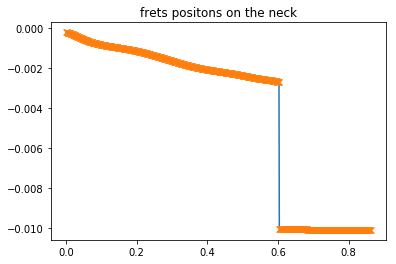

In [22]:
guitar_model, guitar_string, guitar_frets = load_model(inputfile, matlab_input)
#guitar_model._convert[...] = False
frets_file = matlab_input + '_h.mat'
all_frets_positions = scipy.io.loadmat(frets_file)['h'][:, 0]
x = np.linspace(0, guitar_string.length, 862 + 2)
x = x[1:-1]
for i in range(len(guitar_frets)):
    ic = guitar_frets[i].contact_index
    #guitar_frets[0].contact_pos
    #print(all_frets_positions[ic+1:ic+2], guitar_frets[i].relation().e()[0])
    print(ic, x[ic])
guitar_string.q().shape
guitar_model.convert_modal_output(guitar_string)



In [7]:
velmod = np.load('./temp.npy')
vel = np.dot(guitar_string.s_mat, velmod)

-0.000261539907915
-0.000213863436233
0.000226050936233
(15601,)


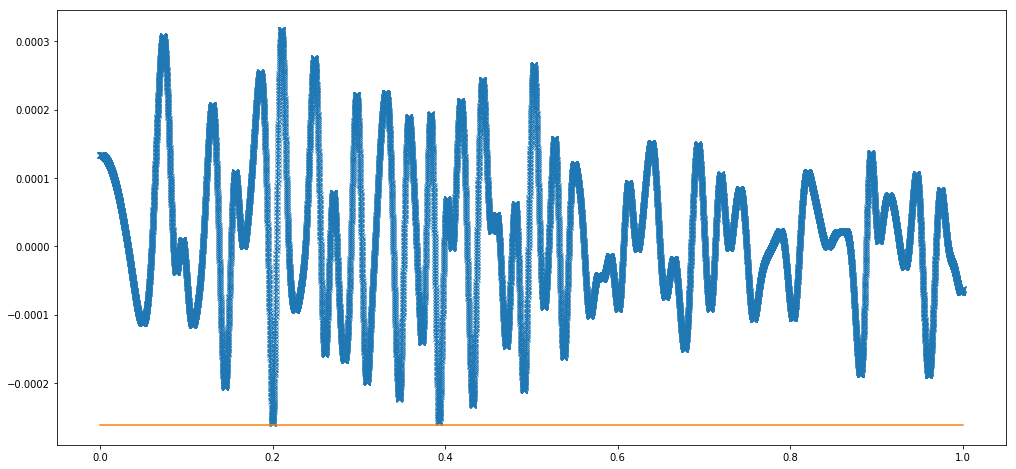

In [26]:
# Plot dof 10 and 50
dof = 10
ground = all_frets_positions[dof]
print(ground)
print(-guitar_frets[0].relation().e()[0])
#guitar_model.plot_traj(guitar_string, dof=dof, iplot=2, ground=ground)
time = guitar_model.time
pos = guitar_model.data_ds[guitar_string]
plt.figure(0, figsize=(17, 8))
plt.clf()
plt.plot(time, pos[dof,:], 'x-')#, time, pos[dof-1, :], '-', time, pos[dof+1,:], '-')
plt.plot((time[0], time[-1]), (ground, ground))
#plt.xlim(0.05, 0.07)
# Plot dof 55 and save result in displacements_55.pdf
#guitar_model.plot_traj(guitar_string, dof=55, filename='displacements_55.pdf', iplot=2x[0]
q0 = guitar_model.data_ds[guitar_string][:,0]
y0 = guitar_model.data_interactions[guitar_frets[0]][:, 0]
#plt.clf()
print(y0[0])
print(y0.shape)
    
#plt.plot(x, all_frets_positions)
#for i in range(len(guitar_frets)):
#    ic = guitar_frets[i].contact_index
#    plt.plot(x[ic], y0[0], 'o')

#print(all_frets_positions)
#plt.plot(x, q0)
#plt.figure(1, figsize=(17, 8))
#plt.plot(time, vel[47,:], 'o-')
#plt.plot((time[0], time[-1]), (ground, ground))
#plt.xlim(0.049, 0.053)

#y = guitar_model.data_interactions[guitar_frets[0]][:,0]
#y1 = guitar_model.data_interactions[guitar_frets[0]][:,1]
#lam = guitar_model.data_interactions[guitar_frets[0]][:,2]
#plt.figure(2, figsize=(17, 8))
#plt.plot(time, y, 'o-')





## Plot modes

Use guitar_model.plot_modes(guitar_string,plot_shape)

plot_shape = (x,y) where x,y is the resolution of the grid of plots.

Example: 
plot_modes(guitar_string, (4,2)) : splits time range in 8 and plots dof=f(x) for those 8 time instants on 8 figures


Set filename arg to save resulting figure in a file.

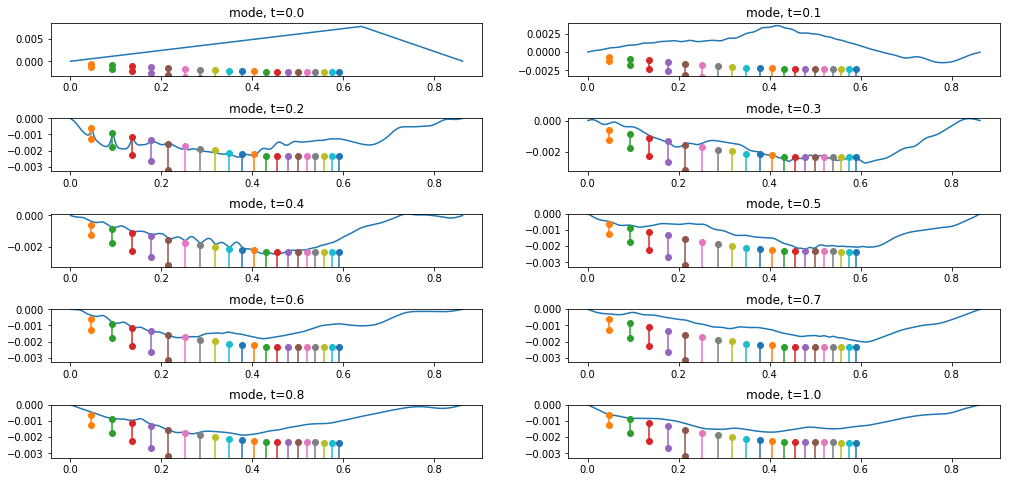

In [13]:
# Plot 10 figures on two columns, for 10 time instants
guitar_model.plot_modes(guitar_string,plot_shape=[5,2], iplot=0)
# Same thing but save output in modes.pdf
#guitar_model.plot_modes(guitar_string,plot_shape=[5,3], filename='modes.pdf', iplot=1)
# plot modes for time[12] and time[5000] on one column
#guitar_model.plot_modes(guitar_string, times =[12, 1200], plot_shape=(2,1), filename='modes2.pdf', iplot=2)

## Create a movie mode=f(time)

In [ ]:
#moviename = os.path.basename(filelist[ifreq])
#moviename = name + '_'  + os.path.splitext(moviename)[0] + '.mp4'
moviename = 'tmp.mp4'
guitar_model.make_movie(guitar_string, moviename)

In [ ]:
os.remove('./last.mp4')
os.symlink(moviename, 'last.mp4')

<video controls src="last.mp4" />
#%%html
#<video width="320" height="240" controls>
#  <source src="./test.mp4" type="video/mp4">
#</video>

## Plot contactogram

    !! Works only if enable_interactions_output=True in model (guitar_model) constructor

In [ ]:
guitar_model.contactogram(guitar_string)